In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV,LinearRegression

In [2]:
mat = pd.read_csv(r"C:\Users\krunal sheth\Downloads\student\student-mat.csv",sep = ';')
mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
mat.shape

(395, 33)

In [4]:
por = pd.read_csv(r"C:\Users\krunal sheth\Downloads\student\student-por.csv",sep = ';')
por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [5]:
por.shape

(649, 33)

In [6]:
df = pd.concat([mat,por],axis = 0,ignore_index=True)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [7]:
df.shape

(1044, 33)

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [10]:
df['address'].unique()

array(['U', 'R'], dtype=object)

In [11]:
df.dtypes 

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [12]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [13]:
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
    if df[col].dtypes == 'object':
        print(f'{col} unique value: {df[col].unique()}')
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        print(f'{col} encoded value: {df[col].unique()}')

school unique value: ['GP' 'MS']
school encoded value: [0 1]
sex unique value: ['F' 'M']
sex encoded value: [0 1]
address unique value: ['U' 'R']
address encoded value: [1 0]
famsize unique value: ['GT3' 'LE3']
famsize encoded value: [0 1]
Pstatus unique value: ['A' 'T']
Pstatus encoded value: [0 1]
Mjob unique value: ['at_home' 'health' 'other' 'services' 'teacher']
Mjob encoded value: [0 1 2 3 4]
Fjob unique value: ['teacher' 'other' 'services' 'health' 'at_home']
Fjob encoded value: [4 2 3 1 0]
reason unique value: ['course' 'other' 'home' 'reputation']
reason encoded value: [0 2 1 3]
guardian unique value: ['mother' 'father' 'other']
guardian encoded value: [1 0 2]
schoolsup unique value: ['yes' 'no']
schoolsup encoded value: [1 0]
famsup unique value: ['no' 'yes']
famsup encoded value: [0 1]
paid unique value: ['no' 'yes']
paid encoded value: [0 1]
activities unique value: ['no' 'yes']
activities encoded value: [0 1]
nursery unique value: ['yes' 'no']
nursery encoded value: [1 0]


In [14]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10


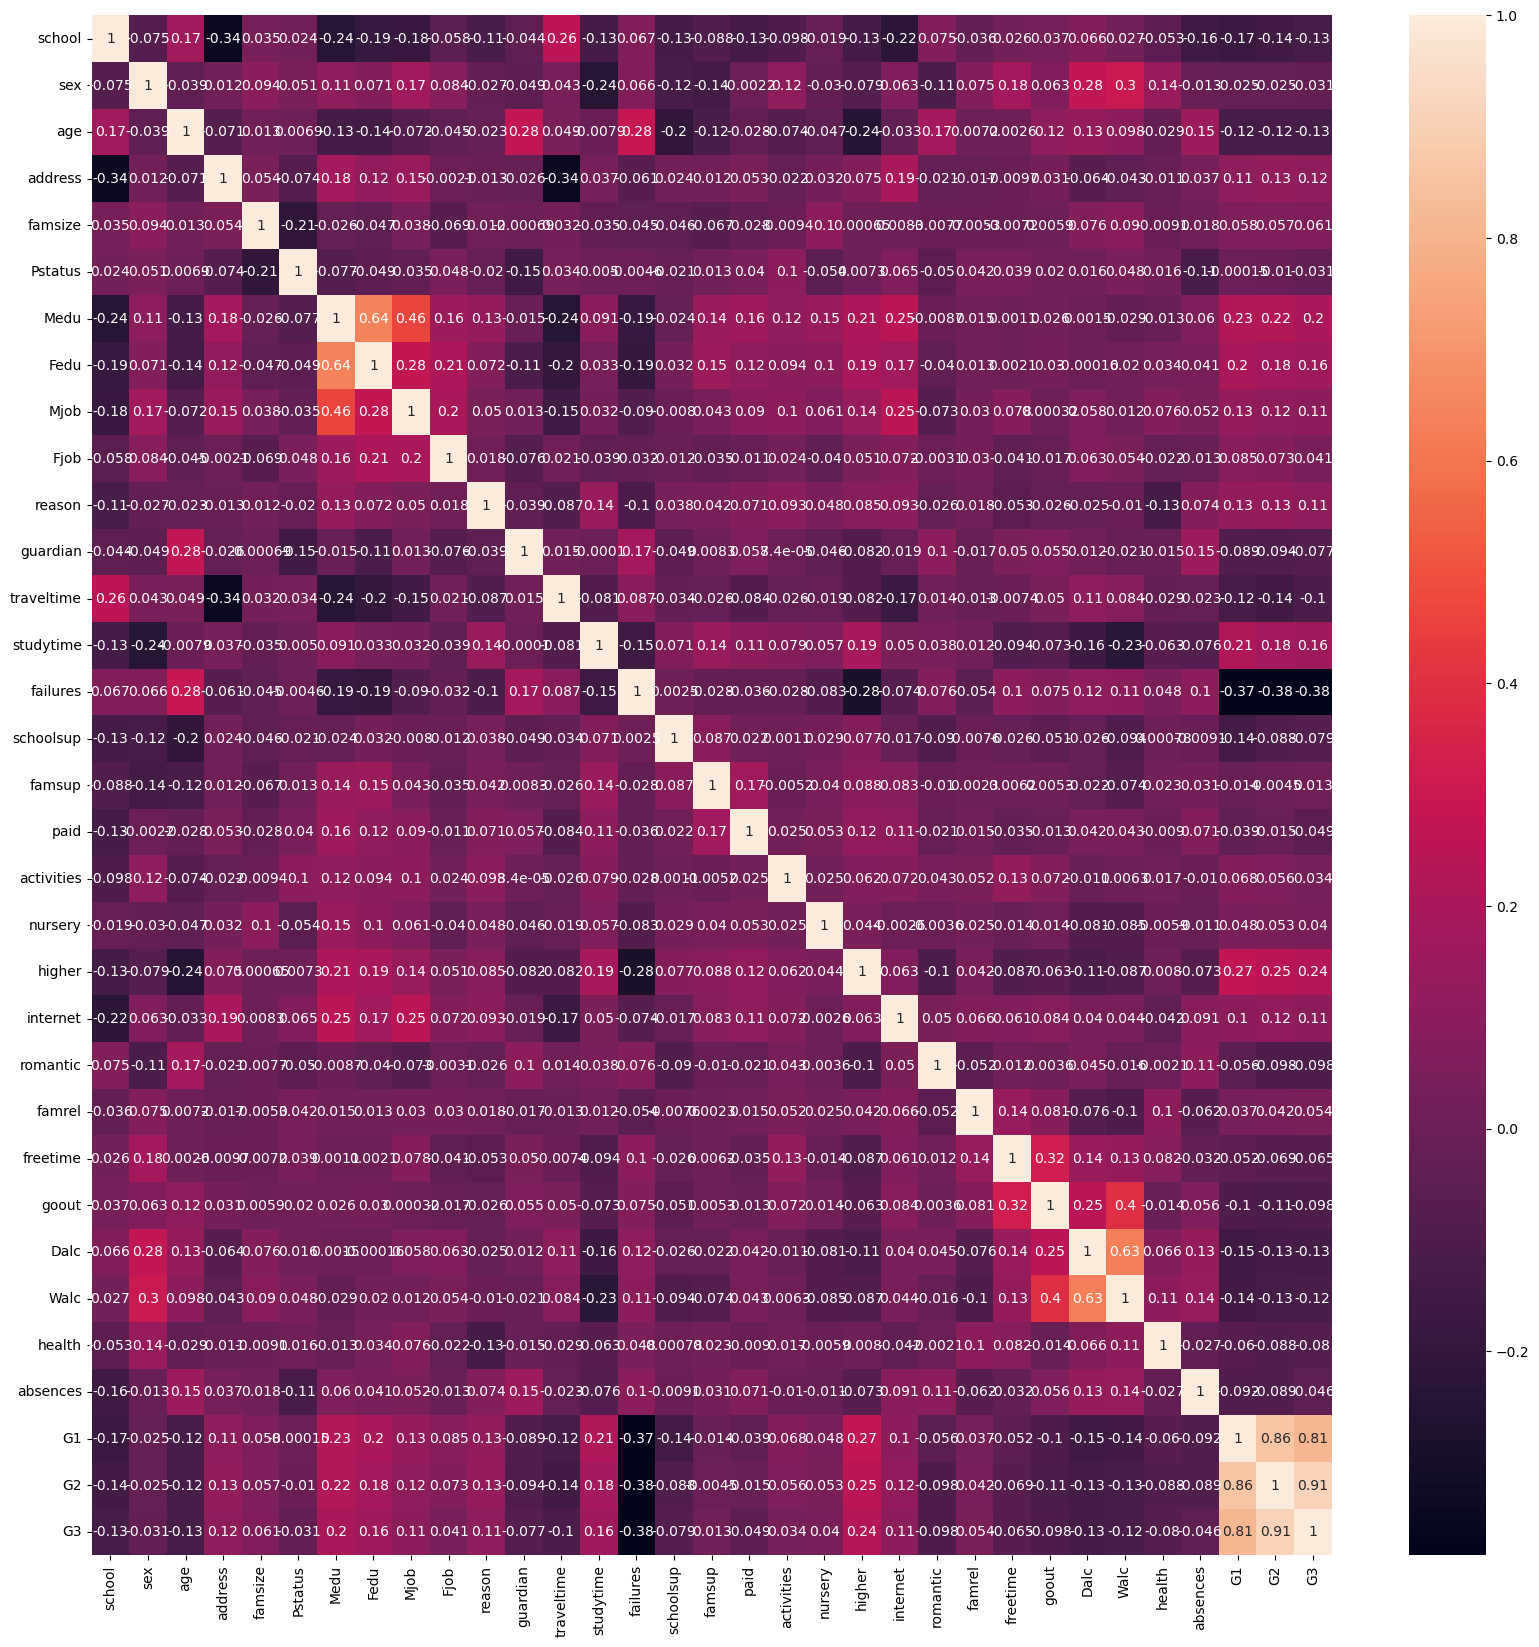

In [15]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(),annot = True)
plt.show()

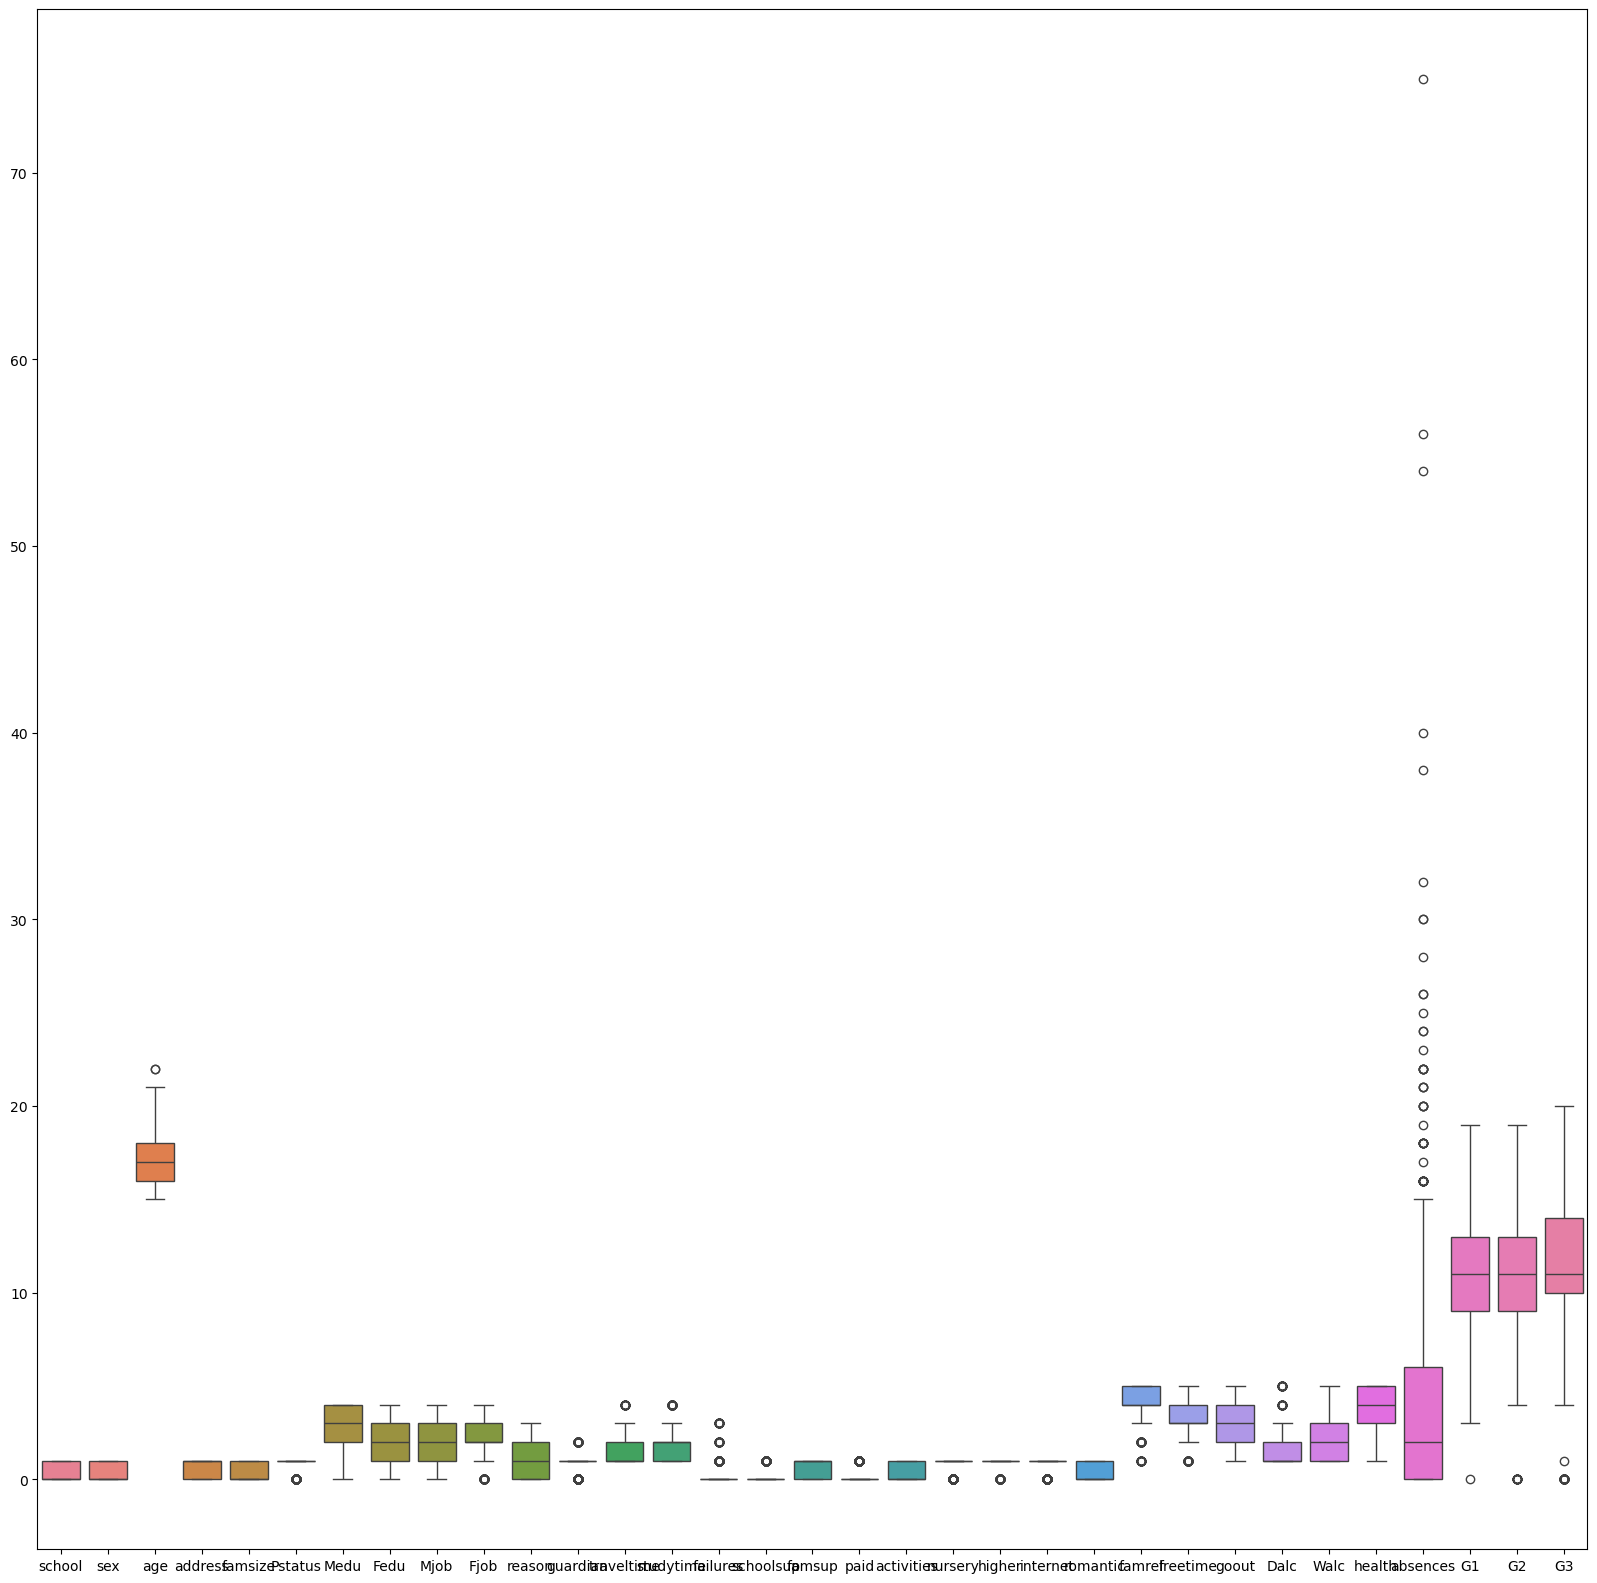

In [16]:
plt.figure(figsize = (20,20))
sns.boxplot(data = df)
plt.show()

In [17]:
df.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,...,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,0.260536,0.433908,16.726054,0.727011,0.293103,0.884100,2.603448,2.387931,2.027778,2.246169,...,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,0.439138,0.495850,1.239975,0.445708,0.455404,0.320259,1.124907,1.099938,1.244815,0.863522,...,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,16.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,2.000000,...,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,0.000000,0.000000,17.000000,1.000000,0.000000,1.000000,3.000000,2.000000,2.000000,2.000000,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,4.000000,3.000000,3.000000,3.000000,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [18]:
df.describe()
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1

outliers = ((df < (Q1 - 1.5*IQR)) | (df > (Q3 + 1.5*IQR))).sum()
outliers

school          0
sex             0
age             2
address         0
famsize         0
Pstatus       121
Medu            0
Fedu            0
Mjob            0
Fjob           62
reason          0
guardian      316
traveltime     24
studytime      62
failures      183
schoolsup     119
famsup          0
paid          220
activities      0
nursery       209
higher         89
internet      217
romantic        0
famrel         77
freetime       64
goout           0
Dalc           52
Walc            0
health          0
absences       54
G1              1
G2             20
G3             54
dtype: int64

In [19]:
dict = {}
for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    dict['upper_limit'+'_'+col] =  upper_limit
    dict['lower_limit'+'_'+col] =  lower_limit

In [20]:
for col in df.columns:
    df[col] = np.where(
    df[col]> dict['upper_limit'+'_'+col],
    dict['upper_limit'+'_'+col],
    np.where(
        df[col]< dict['lower_limit'+'_'+col],
        dict['lower_limit'+'_'+col],
        df[col]
    )
)

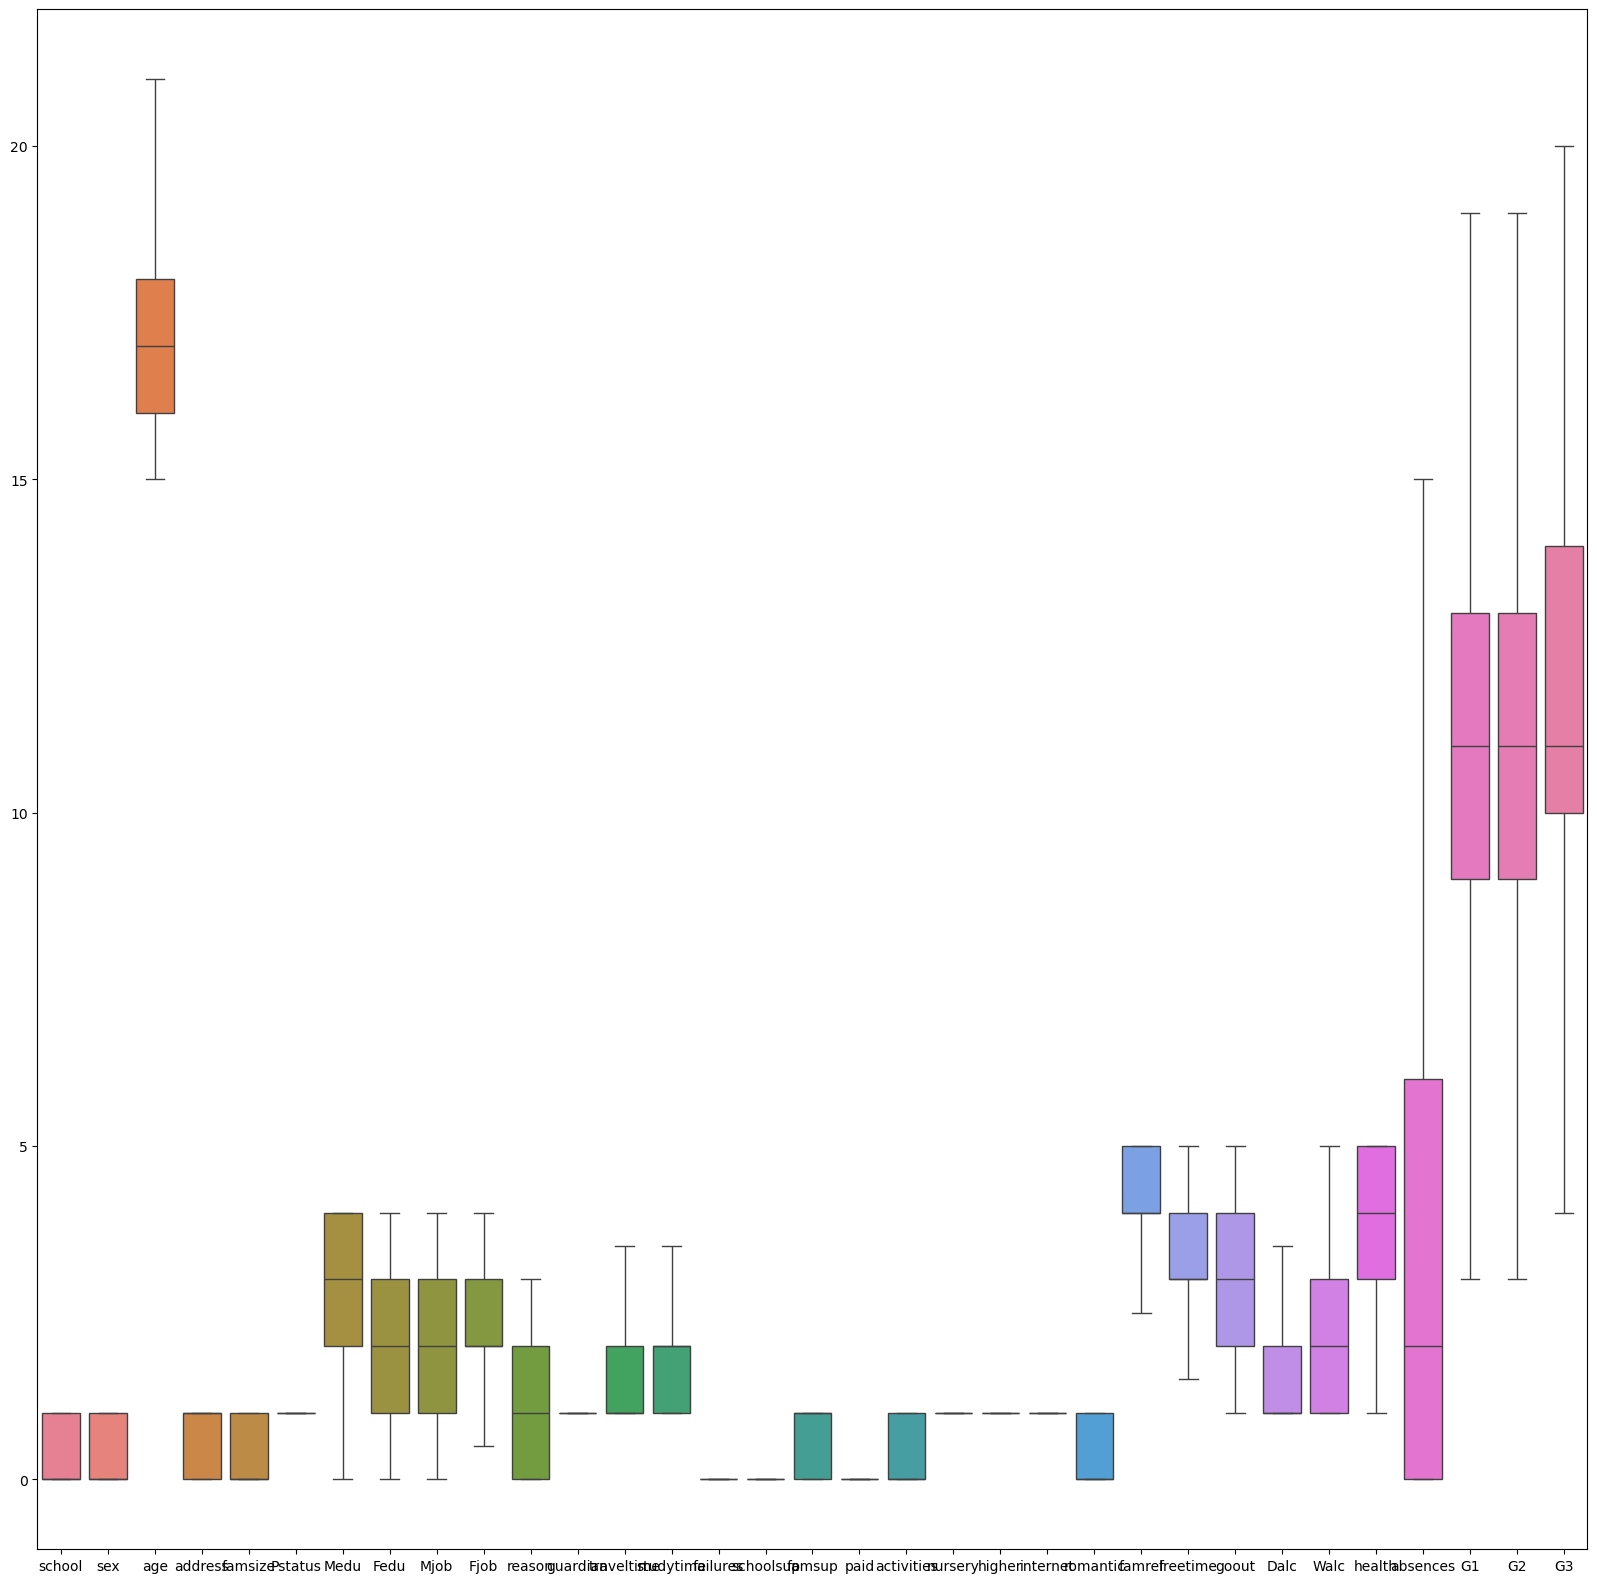

In [21]:
plt.figure(figsize = (20,20))
sns.boxplot(data = df)
plt.show()

In [22]:
x = df.drop(['G3'],axis = 1)
y = df[['G3']]

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 42)

In [24]:
x_train.shape,y_train.shape

((835, 32), (835, 1))

In [25]:
x_test.shape,y_test.shape

((209, 32), (209, 1))

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [27]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_df = pd.DataFrame()
vif_df['vif'] = [variance_inflation_factor(x_train_scaled,i) for i in range(x_train_scaled.shape[1])]
vif_df

C:\Users\krunal sheth\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,vif
0,1.368036
1,1.334874
2,1.173591
3,1.306817
4,1.047507
5,NaN
6,2.085056
7,1.803644
8,1.357365
9,1.113455


In [29]:
vif_df['feature']= x.columns
vif_df

,vif,feature
0,1.368036,school
1,1.334874,sex
2,1.173591,age
3,1.306817,address
4,1.047507,famsize
5,NaN,Pstatus
6,2.085056,Medu
7,1.803644,Fedu
8,1.357365,Mjob
9,1.113455,Fjob


In [30]:
# built model

lr = LinearRegression()
lr.fit(x_train_scaled,y_train)

LinearRegression()

In [31]:
lr.score(x_train_scaled,y_train)

0.8993827508635214

In [32]:
lr.score(x_test_scaled,y_test)

0.8730260304223142

In [33]:
y_pred = lr.predict(x_test_scaled)

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
print('R2 score:',r2_score(y_test,y_pred))

MAE: 0.8137295558890082
MSE: 1.4412727180240426
R2 score: 0.8730260304223142


# Regularization

In [70]:
# Linear Regression with Lasso
lassocv = LassoCV( max_iter = 200)
lassocv.fit(x_train_scaled, y_train)

C:\Users\krunal sheth\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1656: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV(max_iter=200)

In [71]:
lassocv.alpha_

0.06271307715744619

In [72]:
lasso = Lasso(alpha = lassocv.alpha_)
lasso.fit(x_train_scaled, y_train)

Lasso(alpha=0.06271307715744619)

In [73]:
y_pred = lasso.predict(x_test_scaled)
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
print('R2 score:',r2_score(y_test,y_pred))

MAE: 0.7781398647463865
MSE: 1.4269640572591782
R2 score: 0.8742866020226329


In [39]:
# ridge

In [40]:
# Linear Regression with Ridge
ridgecv = RidgeCV(alphas = np.random.uniform(0,10,50),cv=10)
ridgecv.fit(x_train_scaled, y_train)

RidgeCV(alphas=array([8.18636193, 1.77042283, 7.20967921, 5.2163464 , 7.98181171,
       4.31098971, 7.21897857, 4.30645576, 1.75881105, 9.92904117,
       4.75064432, 0.16807586, 0.96925064, 6.09403623, 2.74623391,
       0.42831508, 9.11092559, 1.73502652, 0.35819751, 3.34831435,
       4.82284856, 2.03415699, 8.59286285, 2.06448664, 0.40193684,
       2.96274157, 9.11789367, 0.88205783, 9.44710055, 0.55167312,
       8.14948531, 2.58686538, 5.31759476, 4.40722925, 1.04819015,
       1.18988114, 9.48082635, 3.17335126, 3.76654848, 8.9898065 ,
       9.08253191, 6.80749751, 5.53330286, 4.98209303, 5.43867554,
       3.91152615, 8.5947232 , 1.51914482, 2.86542229, 5.20107785]),
        cv=10)

In [41]:
ridgecv.alpha_

2.58686537552736

In [42]:
ridge_lr = Ridge(alpha = ridgecv.alpha_)
ridge_lr.fit(x_train_scaled, y_train)

Ridge(alpha=2.58686537552736)

In [43]:
y_pred = ridge_lr.predict(x_test_scaled)
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
print('R2 score:',r2_score(y_test,y_pred))

MAE: 0.8137799431797507
MSE: 1.4441537249099294
R2 score: 0.8727722180271256


In [44]:
# ElasticNet

In [45]:
# create linear regression with elasticNet
elastic = ElasticNetCV(alphas = None, cv = 10)
elastic.fit(x_train_scaled, y_train)

C:\Users\krunal sheth\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1656: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ElasticNetCV(cv=10)

In [46]:
elastic_lr = ElasticNet(alpha = elastic.alpha_, l1_ratio = elastic.l1_ratio_ )
elastic_lr.fit(x_train_scaled, y_train)

ElasticNet(alpha=0.02897506842500464)

In [48]:
y_pred = elastic_lr.predict(x_test_scaled)

print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
print('R2 score:',r2_score(y_test,y_pred))

MAE: 0.7986664430412105
MSE: 1.4401052235330305
R2 score: 0.8731288849398042
